In [75]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
l = 0.1

def f(x, beta):
    return beta[0] * x ** (beta[1]) * np.e ** (beta[2] * x)

def r(y, x, beta, fun):
    res = y - fun(x, beta)
    return res

def r_adj(y, x, beta, fun):
    res = r(y, x, beta, fun)
    if res < 0:
        res *= 0.9
    return res

def cost(ys, xs, beta, fun):
    return sum([r_adj(ys[i], x, beta, fun) ** 2 for i, x in enumerate(xs)])

def costd(y, x, beta, fun, funp):
    grad = funp(x, beta)
    return np.array([r_adj(y, x, beta, fun) * grad[j] for j in range(3)])

In [69]:
set1 = [150, 150.909090909091, 151.818181818182, 152.727272727273, 151.136363636364, 152.045454545455, 152.954545454545, 153.863636363636, 152.272727272727, 153.181818181818, 154.090909090909, 152.5, 153.409090909091, 154.318181818182, 155.227272727273, 146.136363636364, 153.276074700493, 154.013331445122, 158.560917921974, 159.292249954471, 159.030552209196, 159.761357745856, 160.491343993796, 161.031444520339, 161.760006904183, 162.755232002254, 157.695704865228, 158.688765798209, 158.794474873158, 155.71532630068, 156.783635334823, 157.853036709491, 158.762127618582, 159.671218527673]
set2 = [162.5, 163.484848484849, 164.469696969697, 170.454545454546, 171.439393939394, 177.424242424242, 178.409090909091, 181.89393939394, 182.878787878788, 183.863636363637, 182.348484848485, 183.333333333333, 184.318181818182, 180.30303030303, 181.287878787879, 182.272727272727, 185.027213886437, 187.646775242667, 188.421257387558, 189.085611707775, 189.858480807301, 190.630483461648, 191.5915700363, 192.361629765503, 193.130826199045, 194.218513249495, 195.306779473028, 196.395625178043, 197.691713257043, 198.878700508003, 195.004975834965, 196.189215910647, 197.174064395495, 198.158912880344]
data = set1

In [3]:
xs = [i + 1 for i in range(len(data))]
num = range(len(xs))

In [4]:
for i in range(-5, 5):
    print(i)

-5
-4
-3
-2
-1
0
1
2
3
4


In [59]:
search = []
for i in range(-1,4):
    for j in range(-1,4):
        for k in range(-1,4):
            search.append("{} {} {}".format(i, j, k))
search = set(search)
search = [np.array([int(c) for c in s.split(" ")]) for s in search]
search

[array([2, 1, 2]),
 array([1, 2, 3]),
 array([3, 0, 1]),
 array([-1,  1,  1]),
 array([2, 2, 2]),
 array([ 3, -1,  0]),
 array([2, 0, 1]),
 array([-1,  1,  0]),
 array([0, 3, 2]),
 array([3, 3, 2]),
 array([ 1, -1,  2]),
 array([2, 2, 3]),
 array([ 0,  2, -1]),
 array([-1, -1,  2]),
 array([1, 1, 1]),
 array([ 0, -1,  2]),
 array([0, 1, 3]),
 array([ 3,  2, -1]),
 array([0, 0, 3]),
 array([1, 1, 0]),
 array([ 2,  2, -1]),
 array([-1,  3,  1]),
 array([ 1,  3, -1]),
 array([ 2,  1, -1]),
 array([3, 2, 0]),
 array([ 1, -1,  1]),
 array([3, 1, 1]),
 array([ 2,  3, -1]),
 array([2, 2, 1]),
 array([ 1, -1, -1]),
 array([ 2, -1, -1]),
 array([2, 1, 3]),
 array([3, 0, 2]),
 array([ 0, -1,  3]),
 array([ 0, -1, -1]),
 array([0, 1, 2]),
 array([2, 1, 0]),
 array([ 2, -1,  0]),
 array([ 2,  0, -1]),
 array([ 1,  1, -1]),
 array([0, 0, 2]),
 array([2, 0, 3]),
 array([ 0,  0, -1]),
 array([1, 3, 1]),
 array([3, 1, 2]),
 array([1, 3, 3]),
 array([1, 2, 2]),
 array([3, 1, 0]),
 array([-1,  0, -1]),


In [63]:
def f1(x, b):
    return  b[0] * np.e ** (b[1] / x + b[2] * np.log(x))

def f1p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] / x + b[2] * np.log(x))
    grad[1] = (b[0] * np.e ** (b[1] / x + b[2] * np.log(x))) / x
    grad[2] = np.log(x) * b[0] * np.e ** (b[1] / x + b[2] * np.log(x))
    return grad

def initf1b(w=100):
    return [137.4805 * w / 162.5, 0.1675, 0.1216]

def f2(x, b):
    return  x / (b[0] * x + b[1] * x ** (1 / 2) - b[2])

def f2p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] =  - ((x / (b[0] * x + b[1] * x ** (1 / 2) - b[2])) ** 2)
    grad[1] =  - x ** (3 / 2) / ((b[0] * x + b[1] * x ** (1 / 2) - b[2])) ** 2
    grad[2] =  x / (b[0] * x + b[1] * x ** (1 / 2) - b[2]) ** 2
    return grad

def initf2b(w=100):
    return [0.1492, 0.00495, -0.0296]

def f3(x, b):
    return  x ** b[0] * np.e ** (b[1] * x ** b[2])

def f3p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.log(x) * x ** b[0] * np.e ** (b[1] * x ** b[2])
    grad[1] = x ** (b[0] + b[2]) * np.e ** (b[1] * x ** b[2])
    grad[2] = np.log(x) * x * b[1] ** (b[0] + b[2]) * np.e ** (b[1] * x ** b[2])
    return grad

def initf3b(w=100):
    w = 162.5 / w
    return [0.565, 5.08, -0.113]

def f4(x, b):
    return  b[0] * np.e ** (b[1] * x ** 2 + b[2] * x)

def f4p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] * x ** 2 + b[2] * x)
    grad[1] = x ** 2 * b[0] * np.e ** (b[1] * x ** 2 + b[2] * x)
    grad[2] = x * b[0] * np.e ** (b[1] * x ** 2 + b[2] * x)
    return grad

def initf4b(w=100):
    return [157.38 * w / 162.5, -0.0005342, 0.0215]
######################################
def f5(x, b):
    return  b[0] * x ** 2 + b[1] * x + b[2]

def f5p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x ** 2
    grad[1] = x
    grad[2] = 1
    return grad

def initf5b(w=100):
    return [-0.066, 3.426, w]
#######################################
def f6(x, b):
    return  b[0] * np.log(x + b[1]) - b[2]

def f6p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.log(x + b[1])
    grad[1] = b[0] / (x + b[1])
    grad[2] = -1
    return grad

def initf6b(w=100):
    return [74.5 * w / 162.5, 22.29, 73.6 * w / 162.5]
########################################
def f7(x, b):
    return  b[0] * np.log(x + b[1])

def f7p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.log(x + b[1])
    grad[1] = b[0] / (x + b[1])
    grad[2] = 0
    return grad

def initf7b(w=100):
    return [56.9 * 162.5, 15.85, 1]
#######################################
def f8(x, b):
    return  (b[0] * x + b[1]) ** (1 / 2)

def f8p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x * (b[0] * x + b[1]) ** (-1 / 2) / 2
    grad[1] = (b[0] * x + b[1]) ** (-1 / 2) / 2
    grad[2] = 0
    return grad

def initf8b(w=100):
    return [937 * w / 162.5, 25069 * w / 162.5, 0]
#######################################
def f9(x, b):
    return  np.log(b[0] * np.e ** (b[1] * x) + 1) + b[2]

def f9p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] * x) / np.log(b[0] * np.e ** (b[1] * x) + 1)
    grad[1] = b[0] * x * e ** (b[1] * x) / np.log(b[0] * np.e ** (b[1] * x) + 1)
    grad[2] = 1
    return grad

def initf9b(w=100):
    return [0.0366, 2.718, w]
#######################################
def f10(x, b):
    return  b[0] * x + b[1] / x ** 2 + b[2]

def f10p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x
    grad[1] = 1 / x ** 2
    grad[2] = 1
    return grad

def initf10b(w=100):
    return [2.78, 1.269, w]
#######################################
def f11(x, b):
    return  b[0] * x ** b[1] + b[2]

def f11p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x ** b[1]
    grad[1] = b[0] * np.log(x) * x ** b[1]
    grad[2] = 1
    return grad

def initf11b(w=100):
    return [3.58, 0.89, w]
#######################################
def f12(x, b):
    return  b[0] * np.e ** (-b[1] / (x + b[2]))

def f12p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (-b[1] / (x + b[2]))
    grad[1] = b[0] * (-1 / (x + b[2]))
    grad[2] = b[0] * (-b[1]) / (x + b[2]) ** 2 * np.e ** (-b[1] / (x + b[2]))
    return grad

def initf12b(w=100):
    return [692.9 * w / 162.5, -122, 83.2]
#######################################
def f13(x, b):
    return  b[0] * x + b[1] * x ** (1 / 2) + b[2]

def f13p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x
    grad[1] = x ** (1 / 2)
    grad[2] = 1
    return grad

def initf13b(w=100):
    return [2.31, 1.64, w]
#######################################
def f14(x, b):
    return  b[0] * x + b[1] * x / (x - b[2])

def f14p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x
    grad[1] = x / (x - b[2])
    grad[2] = b[1] * x / (x - b[2]) ** 2
    return grad

def initf14b(w=100):
    return [2.77, w, 0.00626]
########################################
def f15(x, b):
    return  b[0] * x + b[1] + b[2] / x

def f15p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x
    grad[1] = 1
    grad[2] = 1 / x
    return grad

def initf15b(w=100):
    return [2.77, w, 0.985]
########################################
def f16(x, b):
    return  b[0] * x + b[1]

def f16p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x
    grad[1] = 1
    grad[2] = 0
    return grad

def initf16b(w=100):
    return [2.77, w, 0]
#######################################
def f17(x, b):
    return  b[0] * np.e ** (b[1] * x) - b[2]

def f17p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] * x)
    grad[1] = b[0] * x * np.e ** (b[1] * x) 
    grad[2] = -1
    return grad

def initf17b(w=100):
    return [620 * w / 162.5, 0.00424, -461 * w / 162.5]
########################################
def f18(x, b):
    return  b[0] * x ** b[1] * np.e ** (b[2] * x)

def f18p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x ** b[1] * np.e ** (b[2] * x)
    grad[1] = b[0] * x * np.log(x) ** b[1] * np.e ** (b[2] * x)
    grad[2] = b[0] * x ** (b[1] + 1) * np.e ** (b[2] * x)
    return grad

def initf18b(w=100):
    return [w, 0.00632, 0.0141]
########################################
def f19(x, b):
    return  b[0] * np.e ** (b[1] * x)

def f19p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] * x)
    grad[1] = b[0] * x * np.e ** (b[1] * x)
    grad[2] = 0
    return grad

def initf19b(w=100):
    return [w, 0.0155, 0]
#########################################
def f20(x, b):
    return  b[0] * x ** 2 + b[1] * x ** (1 / 2) + b[2]

def f20p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x ** 2
    grad[1] = x ** (1 / 2)
    grad[2] = 1
    return grad

def initf20b(w=100):
    return [0.0645, 8.52, w]
########################################
def f21(x, b):
    return  b[0] * (np.e ** (b[1] * x) + 1)

def f21p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] * x) + 1
    grad[1] = b[0] * x * np.e ** (b[1] * x)
    grad[2] = 0
    return grad

def initf21b(w=100):
    return [79.9 * w / 162.5, 0.0286, 0]
#########################################
def f22(x, b):
    return  b[0] * x ** (1 / 2) + b[1]

def f22p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x ** (1 / 2)
    grad[1] = 1
    grad[2] = 0
    return grad

def initf22b(w=100):
    return [11.4, w, 0]
#########################################
def f23(x, b):
    return  b[0] - b[1] / x + b[2] / x ** 2

def f23p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = 1
    grad[1] = -1 / x
    grad[2] = 1 / x ** 2
    return grad

def initf23b(w=100):
    return [w, -97.9, 69.2]
#########################################
def f24(x, b):
    return  b[0] * x ** (b[1] * x)

def f24p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x ** (b[1] * x)
    grad[1] = b[0] * x ** 2 * np.log(x) * x ** (b[1] * x)
    grad[2] = 0
    return grad

def initf24b(w=100):
    return [w, 0.0058, 0]
#########################################
def f25(x, b):
    return  (b[0] * x + b[1]) ** b[2]

def f25p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = x * b[2] * (b[0] * x + b[1]) ** (b[2] - 1)
    grad[1] = b[2] * (b[0] * x + b[1]) ** (b[2] - 1)
    grad[2] = np.log(b[0] * x + b[1]) * (b[0] * x + b[1]) ** b[2]
    return grad

def initf25b(w=100):
    return [290, 6880 * w / 162.5, 5.7]
#########################################
def f26(x, b):
    return  1 / (b[0] * x ** b[1] - b[2])

def f26p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = -x ** b[1] / (b[0] * x ** b[1] - b[2]) ** 2
    grad[1] = -b[0] * np.log(x) * x ** b[1] / (b[0] * x ** b[1] - b[2]) ** 2
    grad[2] = 1 / (b[0] * x ** b[1] - b[2]) ** 2
    return grad

def initf26b(w=100):
    return [0.0231, -0.0164, -0.0168]
########################################
def f27(x, b):
    return  b[0] * np.e ** (b[1] * x ** 2) - b[2]

def f27p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] * x ** 2)
    grad[1] = b[0] * x ** 2 * np.e ** (b[1] * x ** 2)
    grad[2] = -1
    return grad

def initf27b(w=100):
    return [2445 * w / 162.5, 0.0000935, -2280 * w / 162.5]
########################################
def f28(x, b):
    return  b[0] * np.e ** (b[1] * x ** 2)

def f28p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.e ** (b[1] * x ** 2)
    grad[1] = b[0] * x ** 2 * np.e ** (b[1] * x ** 2)
    grad[2] = 0
    return grad

def initf28b(w=100):
    return [w, 0.00129, 1]
########################################
def f29(x, b):
    return  b[0] * np.log(x) + b[1]

def f29p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.log(x)
    grad[1] = 1
    grad[2] = 0
    return grad

def initf29b(w=100):
    return [10.6, w, 0]
########################################
def f30(x, b):
    return  b[0] * np.log(b[1] * np.log(x + b[2]))

def f30p(x, b):
    grad = [0 for _ in range(3)]
    grad[0] = np.log(b[1] * np.log(x + b[2]))
    grad[1] = b[0] * np.log(x + b[2]) / (b[1] * np.log(x + b[2]))
    grad[2] = b[0] / np.log(x + b[2]) ** 2
    return grad

def initf30b(w=100):
    return [w, 0.893, 21.2]
########################################

In [64]:
funs = [
    (f1, f1p, initf1b),
    (f2, f2p, initf2b),
    (f3, f3p, initf3b),
    (f4, f4p, initf4b),
    (f5, f5p, initf5b),
    (f6, f6p, initf6b),
    (f7, f7p, initf7b),
    (f8, f8p, initf8b),
    (f9, f9p, initf9b),
    (f10, f10p, initf10b),
    (f11, f11p, initf11b),
    (f12, f12p, initf12b),
    (f13, f13p, initf13b),
    (f14, f14p, initf14b),
    (f15, f15p, initf15b),
    (f16, f16p, initf16b),
    (f17, f17p, initf17b),
    (f18, f18p, initf18b),
    (f19, f19p, initf19b),
    (f20, f20p, initf20b),
    (f21, f21p, initf21b),
    (f22, f22p, initf22b),
    (f23, f23p, initf23b),
    (f24, f24p, initf24b),
    (f25, f25p, initf25b),
    (f26, f26p, initf26b),
    (f27, f27p, initf27b),
    (f28, f28p, initf28b),
    (f29, f29p, initf29b),
    (f30, f30p, initf30b),
]

In [65]:
funs

[(<function __main__.f1(x, b)>,
  <function __main__.f1p(x, b)>,
  <function __main__.initf1b(w=100)>),
 (<function __main__.f2(x, b)>,
  <function __main__.f2p(x, b)>,
  <function __main__.initf2b(w=100)>),
 (<function __main__.f3(x, b)>,
  <function __main__.f3p(x, b)>,
  <function __main__.initf3b(w=100)>),
 (<function __main__.f4(x, b)>,
  <function __main__.f4p(x, b)>,
  <function __main__.initf4b(w=100)>),
 (<function __main__.f5(x, b)>,
  <function __main__.f5p(x, b)>,
  <function __main__.initf5b(w=100)>),
 (<function __main__.f6(x, b)>,
  <function __main__.f6p(x, b)>,
  <function __main__.initf6b(w=100)>),
 (<function __main__.f7(x, b)>,
  <function __main__.f7p(x, b)>,
  <function __main__.initf7b(w=100)>),
 (<function __main__.f8(x, b)>,
  <function __main__.f8p(x, b)>,
  <function __main__.initf8b(w=100)>),
 (<function __main__.f9(x, b)>,
  <function __main__.f9p(x, b)>,
  <function __main__.initf9b(w=100)>),
 (<function __main__.f10(x, b)>,
  <function __main__.f10p(x, b)

In [82]:
def model_growth(vals, days, fun, funp, initb, max_iter=50):
    beta = initb(vals[0])
    
    for n in range(max_iter):
        jacobian = np.zeros((len(days), 3))
        for i in range(len(days)):
            row = costd(vals[i], days[i], beta, fun, funp)
            if i == len(days) - 1:
                row = row / 100
            for j in range(3):
                jacobian[i][j] = row[j]
        residuals = np.array([r_adj(vals[i], x, beta, fun) for i, x in enumerate(days)])
        vec = np.dot(np.linalg.inv(np.dot(np.transpose(jacobian), jacobian)), np.transpose(jacobian))
        shift = np.dot(vec, residuals)
        betas = []
        for s in search:
            betas.append([cost(vals, days, beta - shift / 10.0 ** s, fun), beta - shift / 10.0 ** s])
            betas.append([cost(vals, days, beta + shift / 10.0 ** s, fun), beta + shift / 10.0 ** s])
        og_cost = cost(vals, days, beta, fun)
        min_cost = og_cost
        for b in betas:
            if b[0] < min_cost:
                min_cost = b[0]
                beta = b[1]
        if og_cost == min_cost:
            break
    return min_cost, beta, fun(days[-1] + 1, beta)

In [83]:
model_growth(data, xs, f18, f18p, initf18b, 1000)

/home/karol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:229: RuntimeWarning: divide by zero encountered in double_scalars


(1784.2647098055315,
 array([ 1.38865950e+02, -1.18125934e-04,  6.64726018e-03]),
 175.16759595886856)

In [84]:
f, fp, initfb = funs[3]
a = []
for i in range(3, len(data)):
    a.append(model_growth(data[:i], xs[:i], f, fp, initfb, 1000)[2])
    print(a[-1])

148.07406431166797
153.57276986920135
150.0739679904932
150.99330213082408
152.44900949553625
153.8735634465946
152.73948505125918
152.91552212008153
153.7478595083557
152.934045217203
153.03745579835297
153.7032988546
154.62388570513818
150.47505586314372
151.1694861061729
152.02132425076275
154.93152866540916
157.2697136134614
158.69822469688805
159.98201379656155
161.1427644906281
162.15258582739995
163.11125116632047
164.13535340821028
163.35714568744328
162.8571104879971
162.0854706626625
161.08512532236378
160.222211406308
159.7839471012192
159.63236095584475


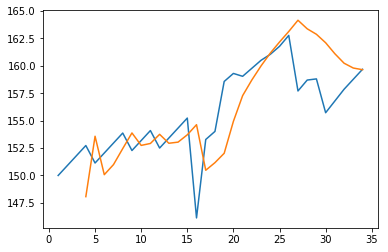

In [85]:
plot(xs, data, xs[3:], a)